In [161]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re

In [7]:
checkpoints = pd.read_csv('./checkpoints.csv')
items = pd.read_csv('./items.csv')
media_views = pd.read_csv('./media_views.csv')
page_views = pd.read_csv('./page_views.csv', low_memory=False)
responses = pd.read_csv('./responses.csv', low_memory=False)

In [172]:
eocFinisher = responses[(responses['review_flag'] == True) & (responses['completes_page'] == True) & (responses['attempt'] <= 1)]

In [126]:
eocFinisher = eocFinisher[['student_id', 'chapter', 'dt_submitted', 'attempt']]

In [127]:
def epoch (date_string ):
    # Convert the string to datetime
    date_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")

    # Convert to epoch (the timestamp() method returns the time in seconds since the epoch)
    epoch_time = date_object.timestamp()

    return epoch_time

epochify = np.vectorize(epoch)

In [173]:
#eocFinisher['dt_submitted'] = epochify(eocFinisher['dt_submitted'])
eocFinisher['chapter'].sort_values()

6575       Chapter 1 - Welcome to Statistics: A Modeling ...
535861     Chapter 1 - Welcome to Statistics: A Modeling ...
535860     Chapter 1 - Welcome to Statistics: A Modeling ...
535859     Chapter 1 - Welcome to Statistics: A Modeling ...
535858     Chapter 1 - Welcome to Statistics: A Modeling ...
                                 ...                        
242057     Chapter 9 - Models with a Quantitative Explana...
1346031    Chapter 9 - Models with a Quantitative Explana...
1346030    Chapter 9 - Models with a Quantitative Explana...
242053     Chapter 9 - Models with a Quantitative Explana...
1581739    Chapter 9 - Models with a Quantitative Explana...
Name: chapter, Length: 16057, dtype: object

In [129]:
supplementalAttempts = pd.merge(eocFinisher, responses[(responses['completes_page'] == True) & (responses['attempt'] >1)][['attempt', 'student_id', 'chapter', 'dt_submitted']], on= ['student_id', 'chapter'], how='inner')

In [130]:
supplementalAttempts['dt_submitted_y'] = epochify(supplementalAttempts['dt_submitted_y'])

In [131]:
supplementalAttempts

,student_id,chapter,dt_submitted_x,attempt_x,attempt_y,dt_submitted_y
0,ed4e4f76-c1a3-4887-ad22-0ab932bbdf15,Chapter 1 - Welcome to Statistics: A Modeling ...,1.681123e+09,1,2,1.680735e+09
1,f4fff4e8-0730-428e-8366-750cf0dee972,Chapter 1 - Welcome to Statistics: A Modeling ...,1.679882e+09,1,2,1.679879e+09
2,f4fff4e8-0730-428e-8366-750cf0dee972,Chapter 1 - Welcome to Statistics: A Modeling ...,1.679882e+09,1,2,1.679881e+09
3,f1374d2a-bd61-4575-8272-f20ee051ce6f,Chapter 1 - Welcome to Statistics: A Modeling ...,1.680753e+09,1,2,1.680752e+09
4,f1374d2a-bd61-4575-8272-f20ee051ce6f,Chapter 1 - Welcome to Statistics: A Modeling ...,1.680753e+09,1,3,1.682378e+09
...,...,...,...,...,...,...
13905,2b0e5422-d7ef-4161-9abe-3bc0f675e178,Chapter 6 - Quantifying Error,1.682587e+09,1,2,1.681459e+09
13906,2b0e5422-d7ef-4161-9abe-3bc0f675e178,Chapter 6 - Quantifying Error,1.682587e+09,1,3,1.681459e+09
13907,2b0e5422-d7ef-4161-9abe-3bc0f675e178,Chapter 6 - Quantifying Error,1.682587e+09,1,4,1.681459e+09
13908,ab375b3d-ef49-4a55-af6c-92b587fda293,Chapter 9 - Models with a Quantitative Explana...,1.685052e+09,1,2,1.684539e+09


In [132]:
supplementalAttempts = supplementalAttempts[supplementalAttempts['dt_submitted_y'] > supplementalAttempts['dt_submitted_x']]

In [133]:
supplementalAttempts.drop(columns=['dt_submitted_x', 'attempt_x', 'attempt_y'])

,student_id,chapter,dt_submitted_y
4,f1374d2a-bd61-4575-8272-f20ee051ce6f,Chapter 1 - Welcome to Statistics: A Modeling ...,1.682378e+09
29,653e6827-e921-44ec-9026-6cc033023e5c,Chapter 1 - Welcome to Statistics: A Modeling ...,1.682143e+09
57,0d5d3654-7d7e-4da2-aff1-fe5405dfca9d,Chapter 1 - Welcome to Statistics: A Modeling ...,1.684340e+09
58,0d5d3654-7d7e-4da2-aff1-fe5405dfca9d,Chapter 1 - Welcome to Statistics: A Modeling ...,1.685759e+09
59,0d5d3654-7d7e-4da2-aff1-fe5405dfca9d,Chapter 1 - Welcome to Statistics: A Modeling ...,1.681860e+09
...,...,...,...
13833,ca3fa3f5-af41-458e-8182-af3f394f32c5,Chapter 2 - Understanding Data,1.675253e+09
13834,ca3fa3f5-af41-458e-8182-af3f394f32c5,Chapter 2 - Understanding Data,1.675253e+09
13835,ca3fa3f5-af41-458e-8182-af3f394f32c5,Chapter 2 - Understanding Data,1.675253e+09
13836,ca3fa3f5-af41-458e-8182-af3f394f32c5,Chapter 2 - Understanding Data,1.675253e+09


In [134]:
supplementalAttempts = supplementalAttempts.groupby(['student_id', 'chapter']).count().reset_index()

In [135]:
supplementalAttempts = supplementalAttempts.drop(columns=['dt_submitted_x', 'attempt_x', 'attempt_y'])

In [136]:
supplementalAttempts = supplementalAttempts.rename(columns={'dt_submitted_y': 'num_submissions'})

In [137]:
supplementalAttempts

,student_id,chapter,num_submissions
0,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,Chapter 2 - Understanding Data,2
1,00fe5bb2-6b64-4a36-a706-eac4dc124ea7,Chapter 3 - Examining Distributions,2
2,01bd8559-8276-4299-9ee4-248c4b4af2a9,Chapter 1 - Welcome to Statistics: A Modeling ...,1
3,01bd8559-8276-4299-9ee4-248c4b4af2a9,Chapter 2 - Understanding Data,6
4,01bd8559-8276-4299-9ee4-248c4b4af2a9,Chapter 3 - Examining Distributions,8
...,...,...,...
588,fdc1aba7-30a8-4a3e-9482-74c37c15d578,Chapter 2 - Understanding Data,1
589,fdc1aba7-30a8-4a3e-9482-74c37c15d578,Chapter 4 - Explaining Variation,4
590,fdc1aba7-30a8-4a3e-9482-74c37c15d578,Chapter 6 - Quantifying Error,2
591,fdc4706b-6963-41e4-9a96-ce7b44b2dc46,Chapter 1 - Welcome to Statistics: A Modeling ...,1


In [138]:
def toNumber(chapter):
    match = re.search(r'\d+', text)
    if match:
        start = match.start()
        # Find the first space after the number or the end of the string
        end = text.find(' ', start)
        # If no space found, take the rest of the string
        number = text[start:end] if end != -1 else text[start:]
        return number
    else:
        return None  # No number found

numberize = np.vectorize(toNumber)

In [139]:
supplementalAttempts['chapter'] = numberize(supplementalAttempts['chapter'])


In [140]:
supplementalAttempts = pd.merge(left= supplementalAttempts, right=checkpoints[['EOC', 'chapter_number', 'student_id']], left_on='chapter', right_on='chapter_number', how='inner')

In [141]:
supplementalAttempts = supplementalAttempts.drop(columns=['student_id_y', 'chapter_number'])
supplementalAttempts = supplementalAttempts.rename(columns={'student_id_x': 'student_id'})
supplementalAttempts

,student_id,chapter,num_submissions,EOC
0,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2,2,0.514563
1,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2,2,0.514563
2,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2,2,0.514563
3,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2,2,0.514563
4,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2,2,0.914634
...,...,...,...,...
3395624,f78feea8-d6a2-4e14-8921-46318893a1ab,9,2,0.652174
3395625,f78feea8-d6a2-4e14-8921-46318893a1ab,9,2,0.409091
3395626,f78feea8-d6a2-4e14-8921-46318893a1ab,9,2,0.393258
3395627,f78feea8-d6a2-4e14-8921-46318893a1ab,9,2,0.268657


In [142]:
supplementalAttempts[['num_submissions', 'EOC']].corr()

,num_submissions,EOC
num_submissions,1.000000,0.011436
EOC,0.011436,1.000000


In [167]:
avgPerChapter = supplementalAttempts.drop(columns=['student_id']).groupby('chapter').mean().reset_index()

In [168]:
avgPerChapter

,chapter,num_submissions,EOC
0,1,2.666667,0.804904
1,2,5.146552,0.704146
2,3,4.384615,0.659845
3,4,4.454545,0.636562
4,5,4.583333,0.659261
5,6,4.247525,0.623048
6,7,2.272727,0.612311
7,8,1.894737,0.620329
8,9,3.333333,0.602346


Text(0.5, 0, 'Chapter Number')

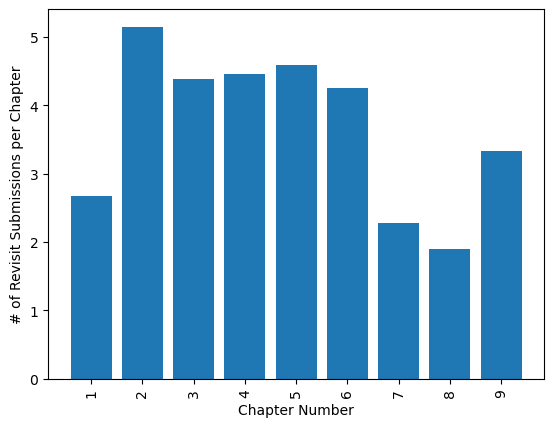

In [169]:
plt.bar(avgPerChapter['chapter'].astype(str), avgPerChapter['num_submissions'])
plt.xticks(rotation=90)
plt.ylabel('# of Revisit Submissions per Chapter')  # This sets the label for the y-axis
plt.xlabel('Chapter Number') 

In [164]:
avgPerChapter

,chapter,num_submissions,EOC
0,1,2.666667,0.804904
1,2,5.146552,0.704146
2,3,4.384615,0.659845
3,4,4.454545,0.636562
4,5,4.583333,0.659261
5,6,4.247525,0.623048
6,7,2.272727,0.612311
7,8,1.894737,0.620329
8,9,3.333333,0.602346


In [146]:
avgPerStudent = supplementalAttempts.groupby('student_id').mean().reset_index()

In [151]:
avgPerStudent[['student_id', 'num_submissions', 'EOC']]

,student_id,num_submissions,EOC
0,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,2.000000,0.704146
1,00fe5bb2-6b64-4a36-a706-eac4dc124ea7,2.000000,0.659845
2,01bd8559-8276-4299-9ee4-248c4b4af2a9,4.632362,0.657330
3,0214e114-d21a-4d46-b6a2-45db4612be5a,1.000000,0.659845
4,03dbe2da-aa81-49d5-8afc-610b4aa0fa0a,3.998600,0.682127
...,...,...,...
366,fb7c9a8b-7b0c-4907-90c1-3a6e5230b486,4.496905,0.656470
367,fbc018fd-291a-4a71-9c94-fe71ce823ca0,1.000000,0.620329
368,fdc1aba7-30a8-4a3e-9482-74c37c15d578,2.332123,0.655339
369,fdc4706b-6963-41e4-9a96-ce7b44b2dc46,1.000000,0.804904


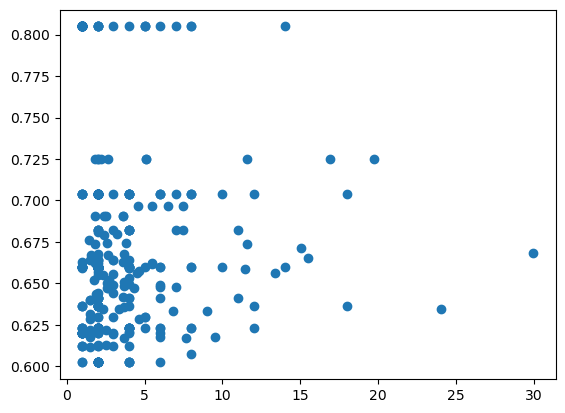

In [152]:
plt.scatter(avgPerStudent['num_submissions'], avgPerStudent['EOC'])